In [1]:
from A3a_rhl72 import *

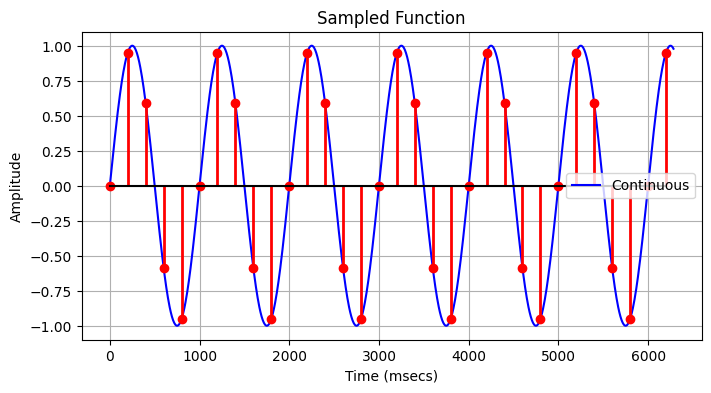

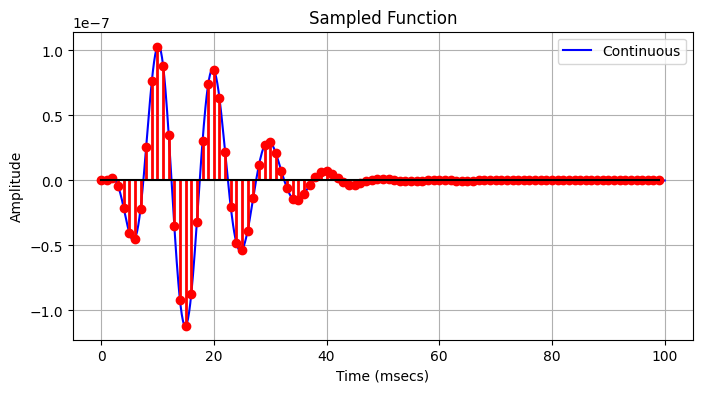

In [2]:
plot_sampled_function(sinewave, fs=5, tlim=(0, 2*np.pi), tscale=1e3, tunits="msecs", f=1.0, d=0.0)


plot_sampled_function(gammatone, fs=1000, tlim=(0, 0.1), tscale=1e3, tunits="msecs", f=100, n=4, phi=0.0, a=1.0)

### Niquist Frequency
acts as a maximum before aliasing
$$
f_N = \frac{f_s}{2}
$$

### Aliasing
occurs when the frequency of the signal is greater than the Nyquist frequncy
$$
f > f_N
$$

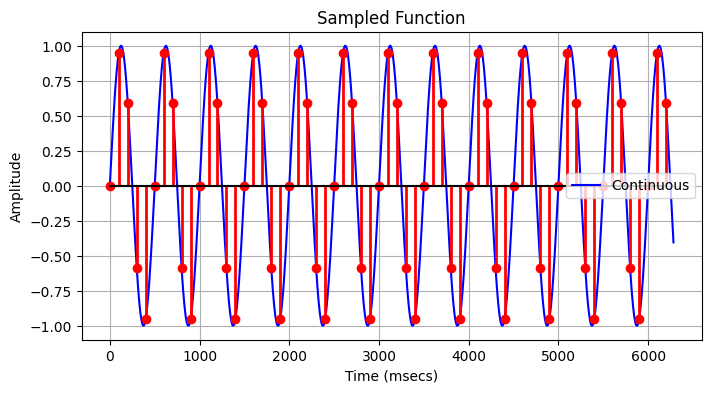

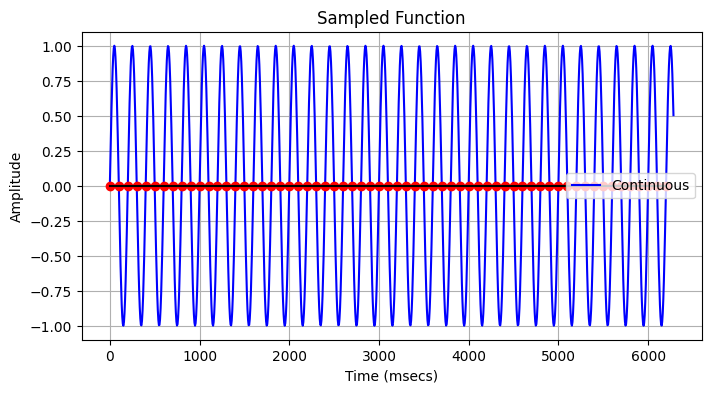

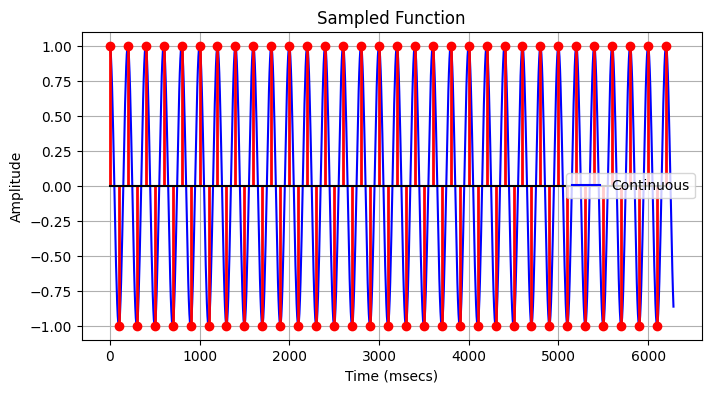

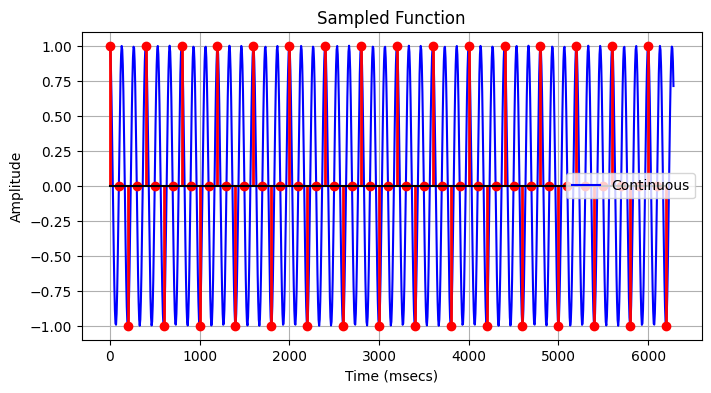

In [3]:
# Below Nyquist: fs = 10 Hz, f = 2 Hz (clearly sampled with only a few points per cycle)
plot_sampled_function(sinewave, fs=10, tlim=(0, 2*np.pi), tscale=1e3, tunits="msecs", f=2)

# At Nyquist: fs = 10 Hz, f = 5 Hz
plot_sampled_function(sinewave, fs=10, tlim=(0, 2*np.pi), tscale=1e3, tunits="msecs", f=5)

# Cosine at Nyquist: using cosine via phase shift
plot_sampled_function(lambda t, **kw: np.cos(2*np.pi*5*t), fs=10, tlim=(0, 2*np.pi), tscale=1e3, tunits="msecs")

# Above Nyquist: fs = 10 Hz, f = 7.5 Hz, which aliases
plot_sampled_function(lambda t, **kw: np.cos(2*np.pi*7.5*t), fs=10, tlim=(0, 2*np.pi), tscale=1e3, tunits="msecs")


# Dirac Delta Function
Used to model an impulse or discrete event as a brief impulse of energy.

$$
\delta(t)=\begin{cases}
\text{undefined} &  t = 0,\\[6pt]
\text{0} & t \neq 0.
\end{cases}
$$

but also,

$$
\int_{-\infty}^{\infty} \delta(t)dt = 1
$$

another way to interpret it is,
$$
\int_{-\infty}^{\infty} f(t) \delta(t-\tau)dt = f(\tau)
$$
- where $\delta(t-\tau)$ is zero everywhere except at $t=\tau$
- and at the infinitesimal point $f(\tau)$ is a constant and so so multiplies the integral, which is one.

# Unit Step Function
The step function is used to indicate a constant signal that starts at t=0.

$$
u(t)=\begin{cases}
\text{1} &  t \geq 0,\\[6pt]
\text{0} & t < 0.
\end{cases}
$$

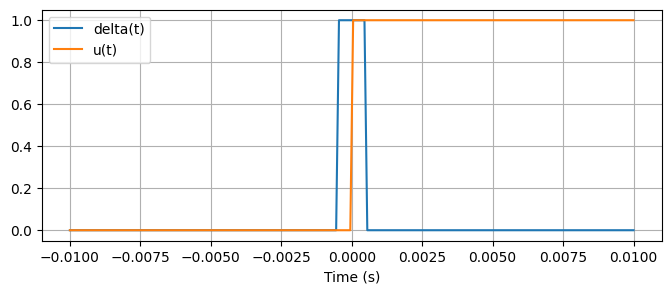

In [4]:
# Example plots:
t = np.linspace(-0.01, 0.01, 200)
plt.figure(figsize=(8,3))
plt.plot(t, delta(t, fs=1000), label="delta(t)")
plt.plot(t, u(t), label="u(t)")
plt.xlabel("Time (s)")
plt.legend()
plt.grid(True)
plt.show()

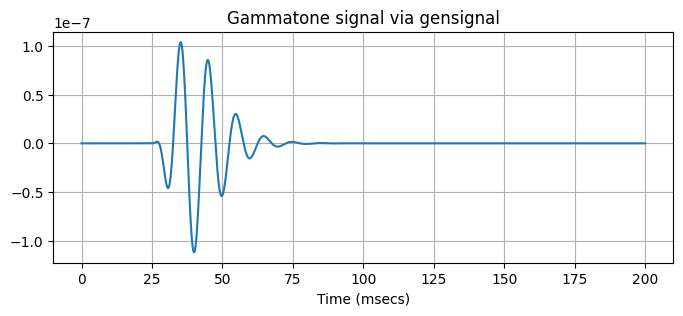

In [5]:
# Example usage: a gammatone signal delayed by 0.025 s and lasting 0.1 s
t = np.linspace(0, 0.2, 1000)
x = gensignal(t, gammatone, tau=0.025, T=0.1, f=100, n=4, phi=0.0, a=1.0)
plt.figure(figsize=(8,3))
plt.plot(t*1e3, x)
plt.xlabel("Time (msecs)")
plt.title("Gammatone signal via gensignal")
plt.grid(True)
plt.show()